In [74]:
# Importar las librerías necesarias
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score




# Cargar el conjunto de datos
pd.read_csv("covid.csv")
df = pd.read_csv("covid.csv")
df.head()


,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,04-05-2020,02-05-2020,9999-99-99,97,2,27,97,...,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,...,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,06-04-2020,01-04-2020,9999-99-99,2,2,54,2,...,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,17-04-2020,10-04-2020,9999-99-99,2,1,30,97,...,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,...,2,1,2,1,2,2,2,99,1,2


In [75]:
# Purgamos la informacion que no necesitamos

eliminar_columnas = ['id', 'patient_type','entry_date','date_symptoms','date_died','other_disease','icu']
df.drop(eliminar_columnas, axis=1, inplace=True)
df.head()

,sex,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res
0,2,97,2,27,97,2,2,2,2,2,2,2,2,2,2,1
1,2,97,2,24,97,2,2,2,2,2,2,2,2,2,99,1
2,1,2,2,54,2,2,2,2,2,2,2,1,2,2,99,1
3,2,2,1,30,97,2,2,2,2,2,2,2,2,2,99,1
4,1,2,2,60,2,1,2,2,2,1,1,2,2,2,99,1


In [76]:
df=df[df['covid_res']!= 3]
df=df[df['contact_other_covid']!= 99]
df=df[df['tobacco']!= 98]
df=df[df['obesity']!= 98]
df=df[df['copd']!= 98]
df=df[df['diabetes']!= 98]
df=df[df['asthma']!= 98]
df=df[df['inmsupr']!= 98]
df=df[df['hypertension']!= 98]
df=df[df['cardiovascular']!= 98]
df=df[df['renal_chronic']!= 98]
df=df[df['intubed']!= 98]
df=df[df['pregnancy']!= 98]
df=df[df['pneumonia']!= 98]

In [77]:
#Separamos las caracteristicas en nuestra variable objetivo
X = df.drop('covid_res', axis=1)
y = df['covid_res']

In [78]:
#dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [79]:
#creamos una instancia del modelo de arbol de decision
arbol_decision = DecisionTreeClassifier(random_state=1)

In [80]:
#Entrenamos el modelo con el conjunto de entrenamiento
arbol_decision.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [81]:
#utilizar el modelo para hacer preddciones en el conjunto de prueba
y_pred = arbol_decision.predict(X_test)

In [85]:
#Evaluamos el desempeño del modelo
accuracy = accuracy_score(y_test, y_pred)
print("La presicion del modelo es: ", accuracy * 100)

La presicion del modelo es:  63.707805138666274


In [83]:
pip install graphviz

/usr/lib/python3/dist-packages/secretstorage/dhcrypto.py:15: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/usr/lib/python3/dist-packages/secretstorage/util.py:19: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Note: you may need to restart the kernel to use updated packages.


In [84]:
from sklearn.tree import DecisionTreeClassifier
arbol_decision = DecisionTreeClassifier(max_depth=3, min_samples_split=10)
arbol_decision.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_split=10)

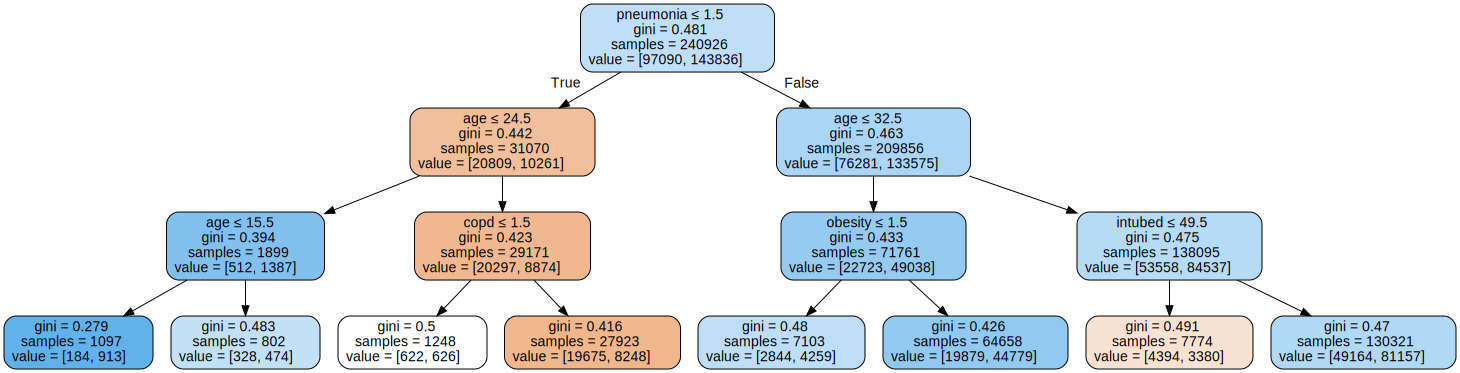

In [70]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(arbol_decision, out_file='arbol_decision.dot', 
               feature_names=X.columns.values, filled=True, rounded=True, special_characters=True)

with open('arbol_decision.dot') as f:
    dot_graph = f.read()
graph = graphviz.Source(dot_graph)
    
graph